In [4]:
import cv2
import numpy as np
import matplotlib.pyplot as plt

In [5]:
def arithmetic_mean_filter(image, kernel_size=3):
    return cv2.blur(image, (kernel_size, kernel_size))

def geometric_mean_filter(image, kernel_size=3):
    img_float = image.astype(np.float32) + 1e-5  # Avoid zero values
    log_image = np.log(img_float)
    mean_log = cv2.boxFilter(log_image, ddepth=-1, ksize=(kernel_size, kernel_size))
    return np.exp(mean_log).astype(np.uint8)

def harmonic_mean_filter(image, kernel_size=3):
    img_float = image.astype(np.float32) + 1e-5  # Avoid division by zero
    inverse = 1.0 / img_float
    mean_inverse = cv2.boxFilter(inverse, ddepth=-1, ksize=(kernel_size, kernel_size))
    return (1.0 / mean_inverse).astype(np.uint8)

def contraharmonic_mean_filter(image, kernel_size=3, Q=1.5):
    img_float = image.astype(np.float32) + 1e-5
    num = cv2.boxFilter(img_float ** (Q + 1), ddepth=-1, ksize=(kernel_size, kernel_size))
    den = cv2.boxFilter(img_float ** Q, ddepth=-1, ksize=(kernel_size, kernel_size))
    return (num / den).astype(np.uint8)

def max_filter(image, kernel_size=3):
    return cv2.dilate(image, np.ones((kernel_size, kernel_size), np.uint8))

def min_filter(image, kernel_size=3):
    return cv2.erode(image, np.ones((kernel_size, kernel_size), np.uint8))

def midpoint_filter(image, kernel_size=3):
    max_img = cv2.dilate(image, np.ones((kernel_size, kernel_size), np.uint8))
    min_img = cv2.erode(image, np.ones((kernel_size, kernel_size), np.uint8))
    return ((max_img + min_img) // 2).astype(np.uint8)

def alpha_trimmed_mean_filter(image, kernel_size=3, d=2):
    pad = kernel_size // 2
    padded_img = cv2.copyMakeBorder(image, pad, pad, pad, pad, cv2.BORDER_REFLECT)
    output = np.zeros_like(image)

    for i in range(image.shape[0]):
        for j in range(image.shape[1]):
            window = padded_img[i:i+kernel_size, j:j+kernel_size].flatten()
            sorted_values = np.sort(window)
            trimmed_values = sorted_values[d//2: -d//2]  # Trim d/2 from each end
            output[i, j] = np.mean(trimmed_values)
    
    return output.astype(np.uint8)

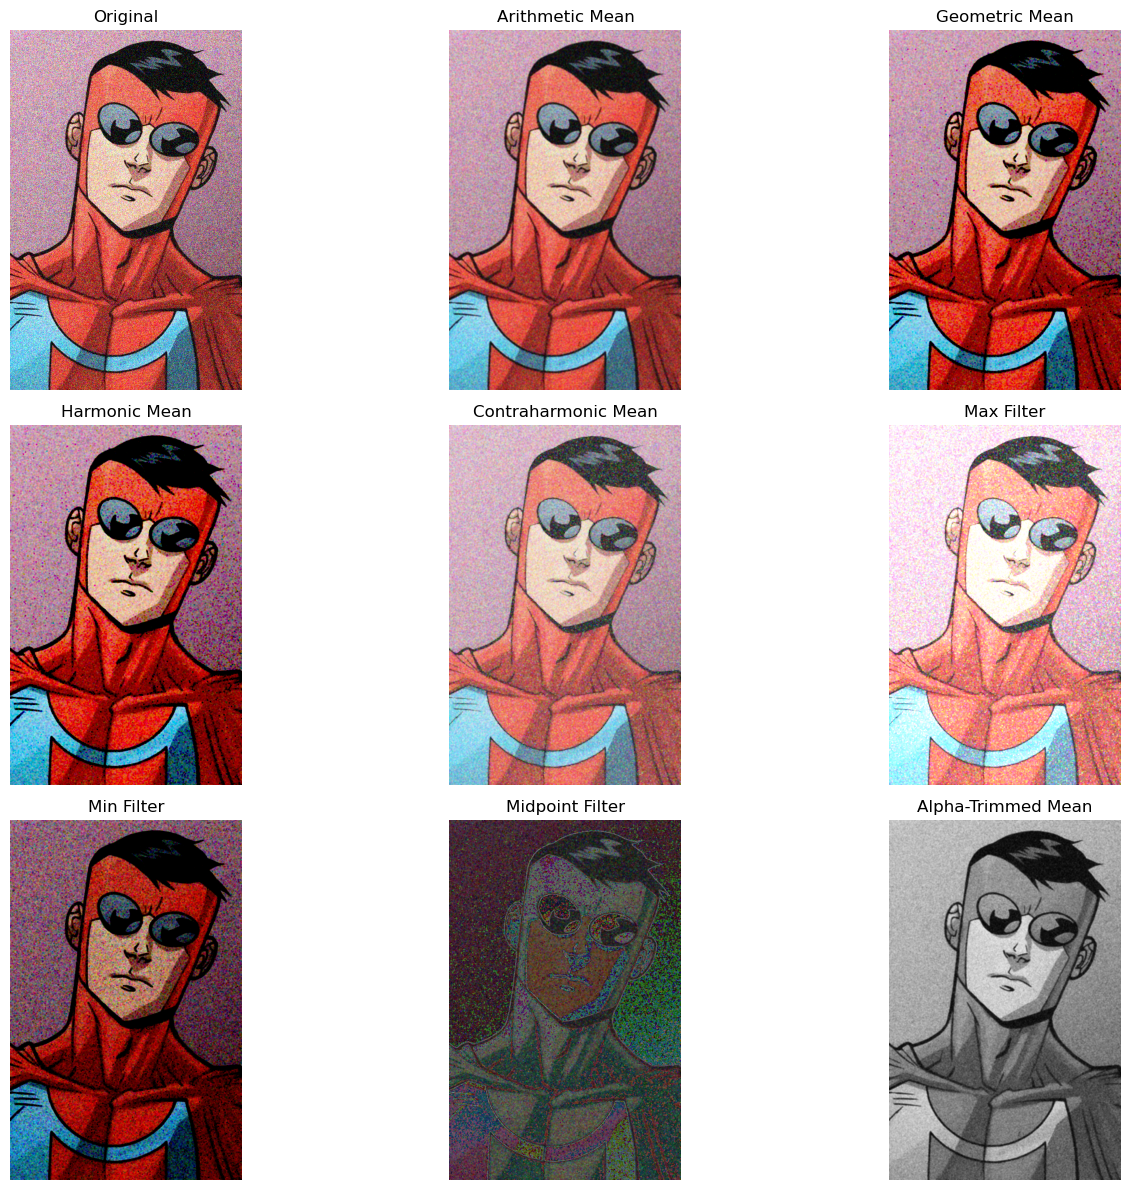

In [8]:
image = cv2.imread("gaussian_noise.png")
image = cv2.cvtColor(image, cv2.COLOR_BGR2RGB)

filters = {
    "Original": image,
    "Arithmetic Mean": arithmetic_mean_filter(image),
    "Geometric Mean": geometric_mean_filter(image),
    "Harmonic Mean": harmonic_mean_filter(image),
    "Contraharmonic Mean": contraharmonic_mean_filter(image),
    "Max Filter": max_filter(image),
    "Min Filter": min_filter(image),
    "Midpoint Filter": midpoint_filter(image),
    "Alpha-Trimmed Mean": alpha_trimmed_mean_filter(image)
}

# Display images in a 3x3 grid
fig, axes = plt.subplots(3, 3, figsize=(15, 12))

for ax, (title, img) in zip(axes.ravel(), filters.items()):
    ax.imshow(img)  # No need for cmap, since images are in RGB
    ax.set_title(title)
    ax.axis("off")

plt.tight_layout()
plt.show()